In [1]:
# importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters  # timestamp converters
import seaborn as sns

In [14]:
# setting up the notebook parameters

root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
plt.rcParams["figure.figsize"] == (20, 8)
register_matplotlib_converters()
sns.set_style("darkgrid")
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

### Helper Functions

In [4]:
def reduce_mem_usage(df, verbose=True):
    """
    reduces the memory usage
    inp: dataframe
    outp: dataframe
    """
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
def info_df(dataframe):
    """
    returns uniques and nulls in the dataframes
    """
    return pd.DataFrame({
        "uniques": dataframe.nunique(),
        "nulls": dataframe.isnull().sum()
    }).T

In [5]:
train_df = pd.read_csv(os.path.join(root_dir, "data", "interim_data", "train_agg.csv"))
train_df = reduce_mem_usage(train_df, verbose=True)                                      # reduces the memory usage
train_df.head()

Mem. usage decreased to 886.86 Mb (64.1% reduction)


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [7]:
######## Don't Run #######
# info_df(train_df)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
uniques,1449,4,8784,1688175,16,16,1397,116,18,619,10,522,128,133,43,58
nulls,0,0,0,0,0,0,0,12127645,16709167,96658,8825365,100140,3749023,1231669,1449048,143676


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             object
meter_reading         float32
site_id               int8
primary_use           object
square_feet           int32
year_built            float16
floor_count           float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: float16(9), float32(1), int16(1), int32(1), int8(2), object(2)
memory usage: 886.9+ MB


1. Foreign_keys:
    - ``building_id``
    - ``site_id``
2. Nulls:
    - ``year_built`` => 12127645
    - ``floor_count`` => 16709167
    - ``air_temperature`` => 96658
    - ``cloud_coverage`` => 8825365
    - ``dew_temperature`` => 100140
    - ``precip_depth_1_hr`` => 3749023
    - ``sea_level_pressure`` => 1231669
    - ``wind_direction`` => 1449048
    - ``wind_speed`` => 143676
3. Categorical columns:
    - ``meter`` => already encoded
    - ``primary_use`` => to be encoded

In [9]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])

#### 1.) frequency of various categories in the ``meter``

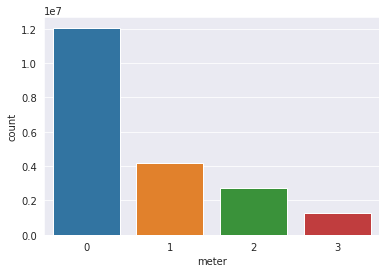

In [15]:
sns.countplot(train_df["meter"])
plt.show()

- Most of the meters are electricity meters. They are followed by chilled water meters, followed by steam and hot water meter.

#### 2.) for one ``building_id``, check whether same ``buidling_id`` have multiple readings for one kind of meter

In [21]:
# groupby building_id and aggregate meter
temp_df = train_df.groupby("building_id").agg({
    "meter": ["nunique", "count"]
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df.sample(5)

,meter_nunique,meter_count
building_id,,
147,1,8784
227,1,8782
356,1,8782
1395,2,14803
637,1,8675


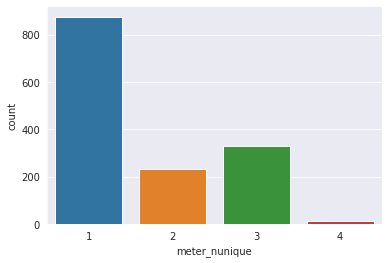

In [25]:
# plot frequencies of meter_nuniques
sns.countplot(temp_df["meter_nunique"])
plt.show()

In [39]:
# building_ids with 4 meters
temp_df[temp_df["meter_nunique"] == 4]

,meter_nunique,meter_count
building_id,,
1232,4,34131
1241,4,35116
1249,4,35136
1258,4,31967
1259,4,35099
1293,4,33714
1294,4,35108
1295,4,35108
1296,4,35115


In [42]:
temp_df[temp_df["meter_nunique"] == 3].sample(5)

,meter_nunique,meter_count
building_id,,
1343,3,22268
190,3,26343
899,3,26311
1345,3,21755
765,3,26325


In [43]:
temp_df[temp_df["meter_nunique"] == 2].sample(5)

,meter_nunique,meter_count
building_id,,
188,2,17562
273,2,17566
174,2,17562
1136,2,17568
1398,2,14804


In [45]:
temp_df[temp_df["meter_nunique"] == 1].sample(5)

,meter_nunique,meter_count
building_id,,
294,1,8782
84,1,8784
137,1,8784
1393,1,7472
1062,1,8784


In [36]:
# Why a certain building_id have so many datapoints
train_df[train_df["building_id"] == 1232].head(8)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1804,1232,0,2016-01-01 00:00:00,211.988007,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,1232,1,2016-01-01 00:00:00,442.558990,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806,1232,2,2016-01-01 00:00:00,0.000000,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,1232,3,2016-01-01 00:00:00,928.492981,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4100,1232,0,2016-01-01 01:00:00,211.000000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4101,1232,1,2016-01-01 01:00:00,364.156006,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4102,1232,2,2016-01-01 01:00:00,0.000000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4103,1232,3,2016-01-01 01:00:00,1093.500000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609


- Only 13 out of 1449 Building_IDs have all four meter types
- We have hourly data for every meter (== 0 | == 1 | == 2 | ==3), 2016-01-01 to 2016-12-31.

#### 3.) for one Building_ID, check whether all the meters follow similar trend or not

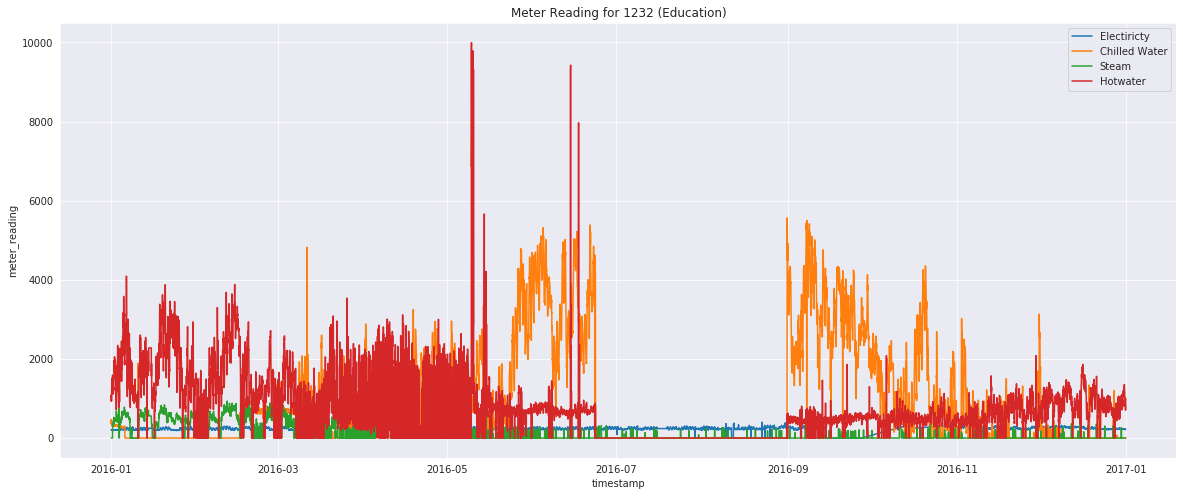

In [105]:
temp_df = train_df[train_df["building_id"] == 1232]

sns.lineplot(x = temp_df[temp_df["meter"] == 0]["timestamp"], y = temp_df[temp_df["meter"] == 0]["meter_reading"], label = "Electiricty")
sns.lineplot(x = temp_df[temp_df["meter"] == 1]["timestamp"], y = temp_df[temp_df["meter"] == 1]["meter_reading"], label = "Chilled Water")
sns.lineplot(x = temp_df[temp_df["meter"] == 2]["timestamp"], y = temp_df[temp_df["meter"] == 2]["meter_reading"], label = "Steam")
sns.lineplot(x = temp_df[temp_df["meter"] == 3]["timestamp"], y = temp_df[temp_df["meter"] == 3]["meter_reading"], label = "Hotwater")
plt.legend()
plt.title("Meter Reading for 1232 (Education)")
plt.show()

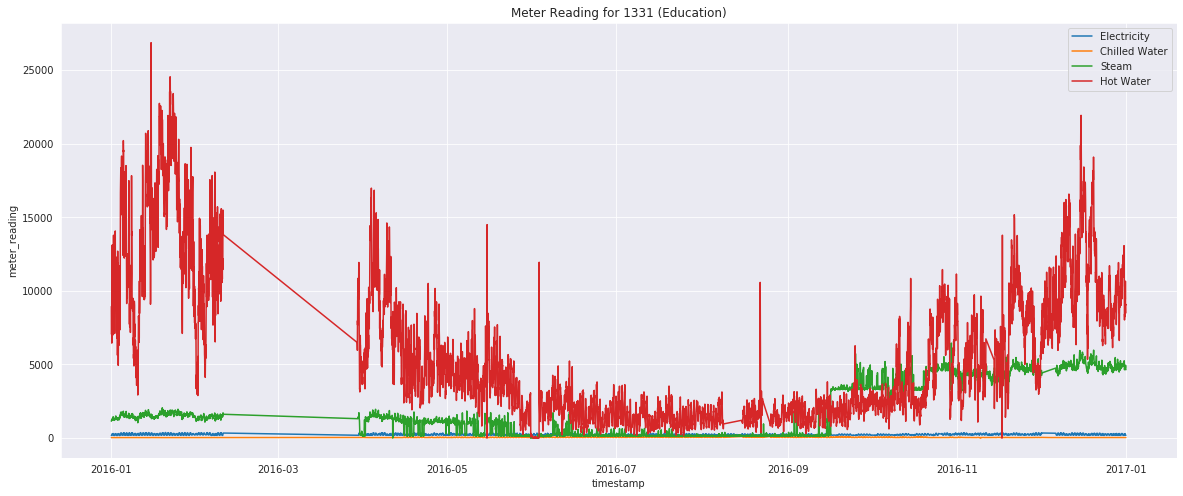

In [106]:
temp_df = train_df[train_df["building_id"] == 1331]

sns.lineplot(x = temp_df[temp_df["meter"] == 0]["timestamp"], y = temp_df[temp_df["meter"] == 0]["meter_reading"], label = "Electricity")
sns.lineplot(x = temp_df[temp_df["meter"] == 1]["timestamp"], y = temp_df[temp_df["meter"] == 1]["meter_reading"], label = "Chilled Water")
sns.lineplot(x = temp_df[temp_df["meter"] == 2]["timestamp"], y = temp_df[temp_df["meter"] == 2]["meter_reading"], label = "Steam")
sns.lineplot(x = temp_df[temp_df["meter"] == 3]["timestamp"], y = temp_df[temp_df["meter"] == 3]["meter_reading"], label = "Hot Water")
plt.legend()
plt.title("Meter Reading for 1331 (Education)")
plt.show()

There are a few problems with this dataset:-
- The dataset contains number of different time series, but a positive sign is that they are defined in the same timespace.
- Certain time series, as we see in the above graph breaks in between, giving it the intermittent nature.
- The scale of every meter is very different from other.

#### 4.) Checking for missing values in the time series

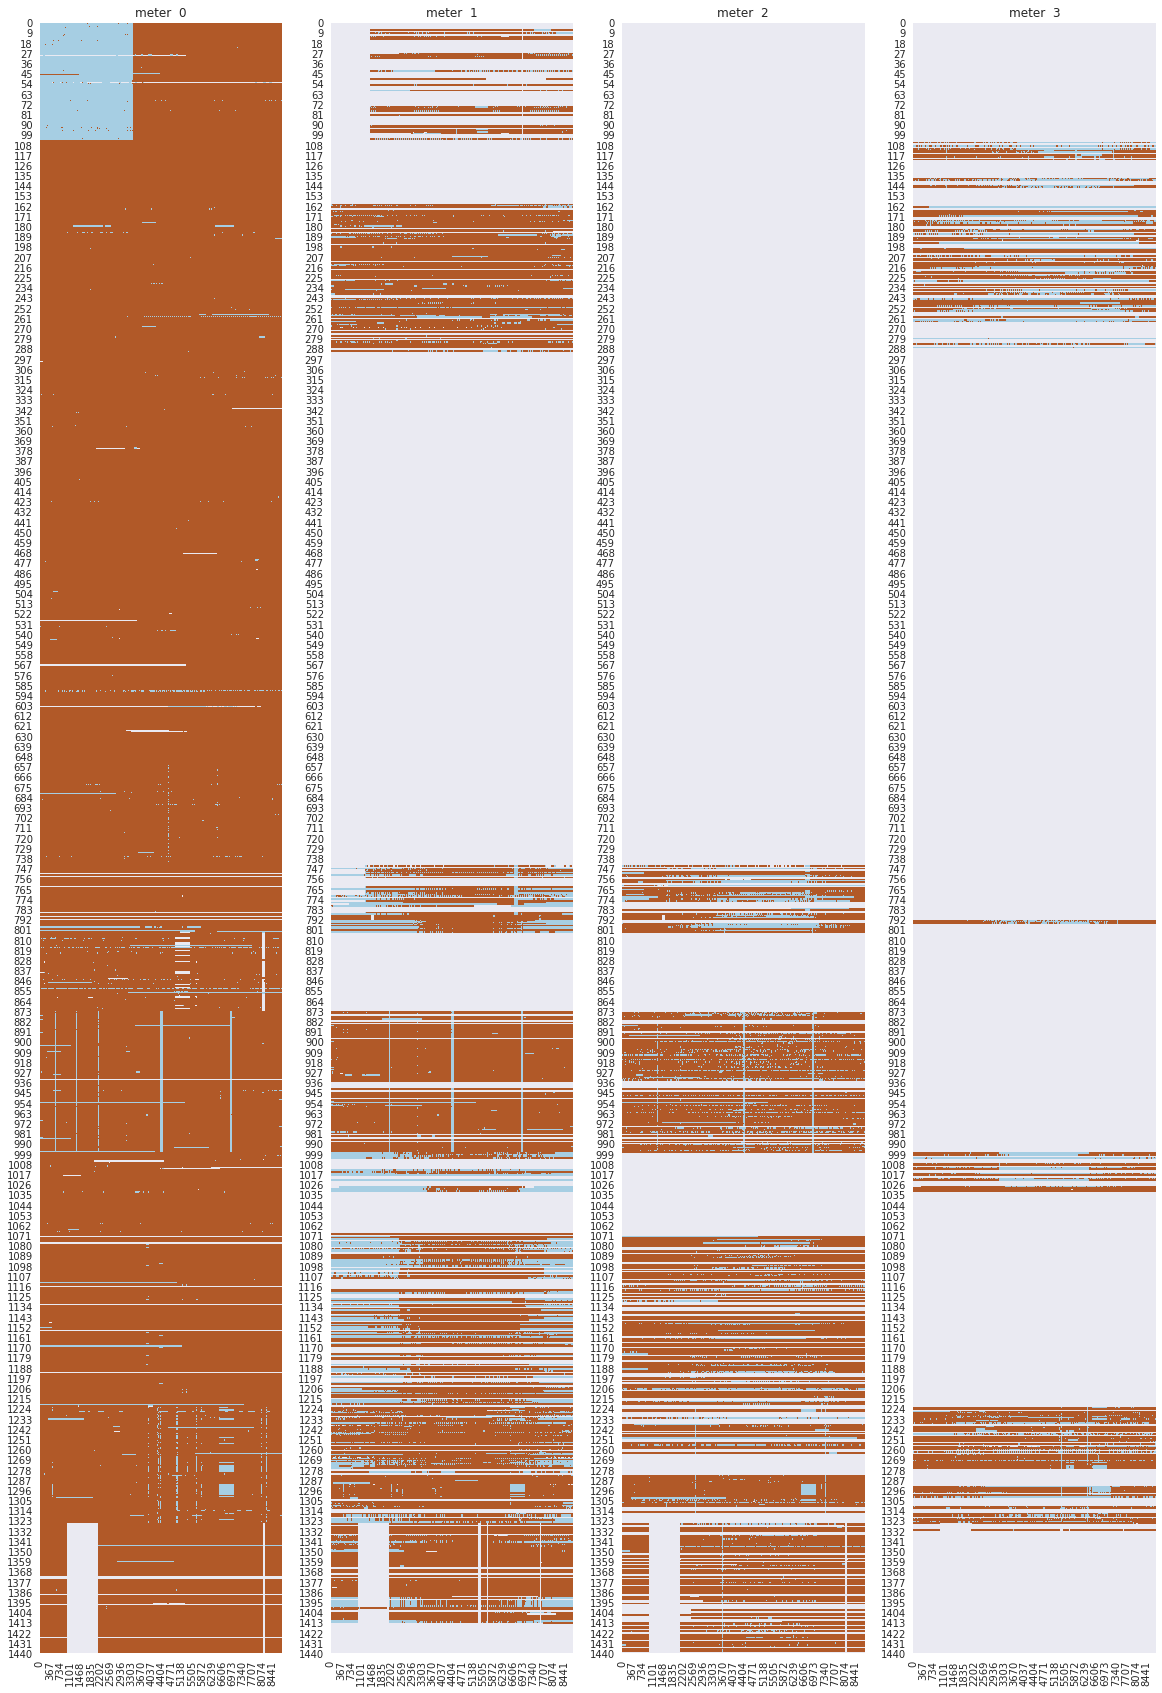

In [110]:
"""
Code for this snippet is attributed to - https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction
"""

#train_df = train_df.set_index(["timestamp"])

# plot missing values per building per meter
f, axis = plt.subplots(1, 4, figsize = (20, 30))
for meter in range(0, 4):
    temp_df = train_df[train_df["meter"] == meter].copy().reset_index()
    temp_df["timestamp"] = pd.to_timedelta(temp_df["timestamp"]).dt.total_seconds() / 3600
    temp_df["timestamp"] = temp_df["timestamp"].astype(int)
    temp_df["timestamp"] -= temp_df["timestamp"].min()
    missmap = np.empty((1449, temp_df["timestamp"].max() + 1))
    missmap.fill(np.nan)
    
    for i in temp_df.values:
        if i[2] != meter:
            continue
        missmap[int(i[1]), int(i[0])] = 0 if i[3] == 0 else 1
    axis[meter].set_title(f"meter {meter: d}")
    sns.heatmap(missmap, cmap = "Paired", ax = axis[meter], cbar = False)